# Linear Regression

This notebook implements linear regression in numpy using the least squares method. Some fitness metrics are also discussed.

Some imports:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

In [2]:
%matplotlib inline

## Simple linear regression: One variable

Linear regression is a method that allows to predict the value of a quantitative respone Y on the basis of some predictor variables $\{X_1, X_2, ..., X_n\}$. This approach assumes a linear relationship between the response and the predictors. This takes the form:

$$
\begin{equation}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n,
\end{equation}
$$

where $\beta_0, \beta_1, ..., \beta_n$ are unknown parameters. First, we implement a simple version where there is only one variable $X$. This leave us with 2 paremeters, the intercept($\beta_0$) and the coefficient($\beta_1$) of the function:
$$
\begin{equation}
Y = \beta_0 + \beta_1X
\end{equation}
$$

Based on a training set we produce the estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ that fit the training data, we can later use them to predict future values of the response $Y$ for new values of $X$ as:
$$
\begin{equation}
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_i
\end{equation}
$$

In this notation $\hat{y}$ is the predicted value of $Y$ for $X = x_i$

### Generate the data

We are gonna try to interpolate the function $y = 5x + 2$

We take randomly 20 points in the interval $[0, 5)$, this correspond to our set of training samples $X = \{x_1, x_2, ..., x_{20}\}$

In [3]:
sample_size = 20

# Parameters to estimate
beta0 = 2
beta1 = 5

# Standard deviation of the simulated irreducible error
e = 2


x = np.random.random_sample(sample_size)*5

array([2.08511002e+00, 3.60162247e+00, 5.71874087e-04, 1.51166286e+00,
       7.33779454e-01, 4.61692974e-01, 9.31301057e-01, 1.72780364e+00,
       1.98383737e+00, 2.69408367e+00, 2.09597257e+00, 3.42609750e+00,
       1.02226125e+00, 4.39058718e+00, 1.36937966e-01, 3.35233755e+00,
       2.08652401e+00, 2.79344914e+00, 7.01934693e-01, 9.90507445e-01])

We compute the dependent variable, $y_i$, mapping with the function and adding some random noise to the data.

We are using zero mean and two standar deviation normal distributed noise.

In [4]:
y = (beta1*x + beta0) + e*np.random.randn(sample_size)

Let's check the data we are going to fit

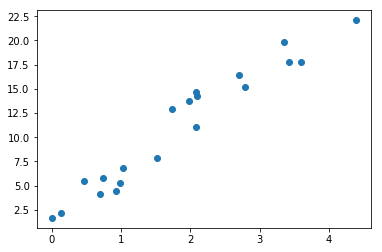

In [5]:
plt.plot(x, y, 'o')
plt.show()

## Least squares method

Now fit the data using the least squares technique, we are going to estimate parameters $\hat{\beta_0}$ and $\hat{\beta_1}$ corresponing to the parameters of the line $y = \beta_0 + \beta_1x$ that generated the data. The least square method computes the parameters that minimize the residual sum of squares (RSS) defined as:
$$
\text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

The analytic solution of the values of $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize the RSS is:
$$
\hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2}, \\
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{x}
$$

In [6]:
def simple_linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_dev = x-x_mean
    y_dev = y-y_mean

    b1 = np.sum(x_dev*y_dev)/np.sum(x_dev**2)
    b0 = y_mean - x_mean*b1
    return b0, b1

Intercept = 1.9627188261838135 
Coefficient = 4.9036031713167985


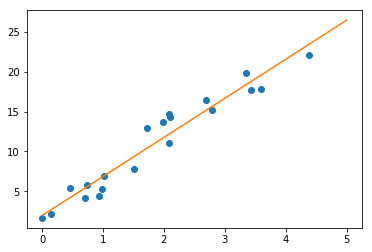

In [8]:
b0, b1 = simple_linear_regression(x, y)
print("Intercept = "+str(b0)+" \nCoefficient = " + str(b1))

# Plottin rergession line over data
x_axis = np.linspace(0, 5, 100)
plt.plot(x, y, 'o')
plt.plot(x_axis, b1*x_axis + b0)
plt.show()

### Making new predictions

We can now predict the response for a new value $x_i$ as:
$$
\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i
$$

In [8]:
def predict(x, beta):
    y = x*0.0
    for i, b in enumerate(beta):
        y += (x**i)*b
    return y

In [9]:
x_test = 2

pred_test = predict(x_test, [b0, b1])

result = "For a test value of x = %.2f, the predicted response is y_hat = %.2f, and the true value is y = %.2f" % (x_test, pred_test, (beta1*x_test + beta0))
print(result)


For a test value of x = 2.00, the predicted response is y_hat = 11.77, and the true value is y = 12.00


## Fitness metrics

### Residual Standard Error of the estimation

The residual standard error (RSE) is an estimate of the standard deviation of the random error term $\epsilon$. Typically we dont know $\epsilon$ and it is considered the irreducible error. However in this case we have generated the data and simulated noise, so $\epsilon$ can be identified with the added noise. This measure gives an estimation of the amount that a prediction deviates from the true line in average. The metric is defined as follows 
$$
\text{RSE} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i - \hat{y}_i)^2},
$$
where $n$ is the number of samples.

In [10]:
def stdError(x, y, beta):
    y_pred = predict(x, beta)
    return np.sqrt(np.sum((y_pred-y)**2)/(x.size-2))

In [11]:
stdE = stdError(x, y, [b0, b1])
print("Standard Error of the estimation is " + str(stdE))

Standard Error of the estimation is 1.5826607353254256


Notice that the output is in units of $y$, so the number on its own does not give much information about the fitness, the magnitud of $y$ should be accounted. It is not the same to deviate $2$ units from the true value when this is $y_i = 10000$ than when it is $y_i = 1$. For this reason the RSE has to be interpreted along with the scale of $Y$. To overcome this limitation we can use the $R^2$ Statistic.

### $R^2$ Statistic


The R squared is used to verify how well the model describes the data. This metric is the proportion of variability explained, because it's a proportion it takes values in the range $[0, 1]$ and avoids the problem of being subject to the scale of $Y$. But how can we measure the explained variability? To do this we can exploit a couple concepts. 

The total variance of the response $Y$ can be measured using the total sum of squares (TSS) defined as
$$
\text{TSS} = \sum_{i=1}^n(y_i - \overline{y})^2
$$

Besides, the residual sum of squares (RSS) represents the amount of variability that is left after performing the regression. The R squared statistic is defined then as
$$
R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}} = \frac{\sum_{i=1}^n (y_i - \hat{y_i})^2}{\sum_{i=1}^n(y_i - \overline{y})^2}
$$

In [13]:
def r2(x, y, beta):
    y_pred = predict(x, beta)
    
    y_mean = np.mean(y)

    y_stdev = (y-y_mean)**2
    y_pstdev = (y_pred-y_mean)**2
    return np.sum(y_pstdev)/np.sum(y_stdev)

Let's check our $R^2$ score

In [14]:
r2score = r2(x, y, [b0, b1])
print("R squared score = " + str(r2score))

R squared score = 0.9398458828913302


It is actually very good, it might be because we have small noise.
For noisier data it should perform worse.

In [15]:
# Use a bigger standard deviation for the simulated error, this is more noise
noisier_e = 5

y_noisy = (beta1*x + beta0) + noisier_e*np.random.randn(sample_size)
r2score = r2(x, y_noisy, simple_linear_regression(x, y_noisy))
print("R squared score = " + str(r2score))

R squared score = 0.7544987814074905


Whould more data manage this? It may be intuitive to use more data to cancel the effect of the noise, as it is zero mean, averaging along multiple samples should cancel it.

In [16]:
big_sample_size = 10000

# Generate a bigger set of simulated data
x_big = np.random.random_sample(big_sample_size)*5
y_big = (beta1*x_big + beta0) + noisier_e*np.random.randn(big_sample_size)


r2score = r2(x_big, y_big, simple_linear_regression(x_big, y_big))
print("R squared score = " + str(r2score))

R squared score = 0.6679421741797268


In this case the $R^2$ has even decreased. But this is just one example and data is generated randomly, we can perform more experiments using different dataset sizes.

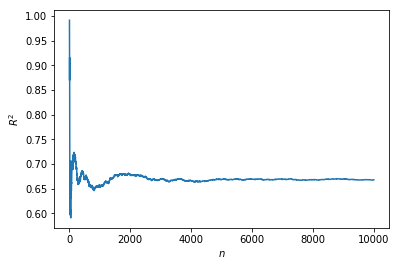

In [17]:
cum_r2 = [r2(x_big[:i], y_big[:i], simple_linear_regression(x_big[:i], y_big[:i])) for i in range(3, big_sample_size)]

plt.plot(range(3, big_sample_size), cum_r2)
plt.ylabel("$R^2$")
plt.xlabel("$n$")
plt.show()

We can see that the computed $R^2$ is constant with the size of the training set. Lets take a look at the equation for computing $R^2$. 
$$
R^2 = 1- \frac{\text{RSS}}{\text{TSS}}, \\
\text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2, \\
\text{TSS} = \sum_{i=1}^n(y_i - \overline{y})^2
$$

We can easily verify that TSS grows linearly with $n$ as the average difference remains the same despite the total number of training samples. However one might expect that the predictions $\hat{y_i}$ improve with the size of de training set, getting closer to $y_i$ and, consquently, RSS not incresing at the same rate as TSS. But we have demostrated empirically that this is not the case, why?

This is due to the irreducible error that we simulated when adding the noise. This irreducible error marks a theoric limit of how much we can approximate to the true response, a higher $R^2$ would mean that we have overfitted the training data. In this case, the true response is a linear relationship, so we cannot overfit.

As we know what the true irreducible error is we can compare it against the estimated one(recall that RSE is an estimate of this irreducible error). Lets perform the same experiment for different training sets sizes, but computing also the RSE. When the estimate of the irreducible error gets accurate, we can say that $R^2$ has reached the theoretic limit.

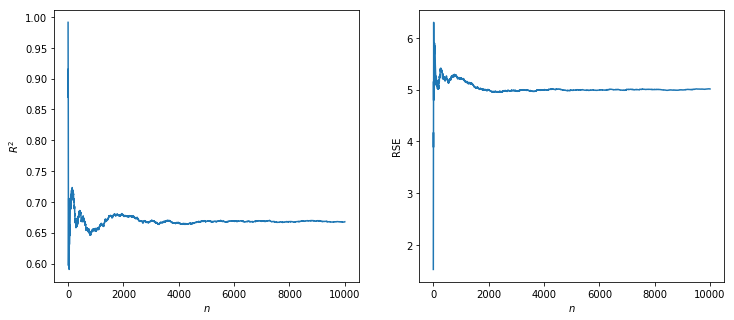

In [18]:
cum_rse = [stdError(x_big[:i], y_big[:i], simple_linear_regression(x_big[:i], y_big[:i])) for i in range(3, big_sample_size)]

f, axarr = plt.subplots(1, 2, figsize=(12, 5))

axarr[0].plot(range(3, big_sample_size), cum_r2)
axarr[0].set_ylabel("$R^2$")
axarr[0].set_xlabel("$n$")

axarr[1].plot(range(3, big_sample_size), cum_rse)
axarr[1].set_ylabel("RSE")
axarr[1].set_xlabel("$n$")


plt.show()

## Comparison to the sklearn implementation

To the aim of validating our results let's compare them against the linear regression implementation of sklearn. 

In [19]:
from sklearn import linear_model

In [20]:
linear = linear_model.LinearRegression()
linear.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print("Sklearn theta0: " + str(linear.intercept_))
print("Sklearn theta1: " + str(linear.coef_))
print("Sklearn R squared: " + str(linear.score(x.reshape(-1, 1), y.reshape(-1, 1))))

Sklearn theta0: [1.96271883]
Sklearn theta1: [[4.90360317]]
Sklearn R squared: 0.9398458828913299


The same! Not surprise really.. This is beacuase the algorithm is deterministic. In more complex algorithms such as in a MLP we could different results due to, for example, random initialization.

## General linear regression: multiple independant variables

The model can be generalized as:
$$
Y = \beta X
$$
where $\beta$ is the vector $[\beta_0, \beta_1, ..., \beta_n]$ and X is the collection of examples(one per column). The first entry in each training example is $1$ as it is the coefficient of the intercept.

In this case instead of fitting a line we fit an n-dimensional hyperplane. Let's see this in 2D

In [22]:
sample_size = 20

# Parameters to estimate
beta = np.array([2, 5, 4])

# Standard deviation of the simulated irreducible error
e = 2

# Generate random points
x = np.random.rand(3, sample_size)*5

# First feature must be 0 as it's the intercept coefficient
x[0, :] = 1

# Simulate data with noise
y = (np.matmul(beta, x)) + e*np.random.randn(sample_size)

### Visualize the data

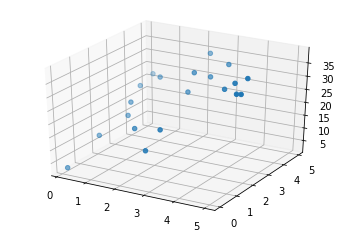

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(x[1, :], x[2, :], y);
plt.show()

### Estimator for $\beta$

Using the least squares method the resulting estimator is:
$$
\hat{\beta} = (X^TX)^{-1}X^TY
$$

In [25]:
beta_hat = np.matmul(y, np.matmul(np.linalg.pinv(np.matmul(x.T, x)), x.T))

In [26]:
beta_hat

array([2.70019961, 5.04741   , 4.07593242])